# EDA для маркетингових даних


In [1]:
#Підвантаження бібліотек
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import KMeans
%matplotlib inline
sns.set()

Завантажимо наші дані.

In [2]:
df_ifood = pd.read_csv('ifood_df.csv', sep = ',')
df_ifood.head()

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,marital_Together,marital_Widow,education_2n Cycle,education_Basic,education_Graduation,education_Master,education_PhD,MntTotal,MntRegularProds,AcceptedCmpOverall
0,58138.0,0,0,58,635,88,546,172,88,88,...,0,0,0,0,1,0,0,1529,1441,0
1,46344.0,1,1,38,11,1,6,2,1,6,...,0,0,0,0,1,0,0,21,15,0
2,71613.0,0,0,26,426,49,127,111,21,42,...,1,0,0,0,1,0,0,734,692,0
3,26646.0,1,0,26,11,4,20,10,3,5,...,1,0,0,0,1,0,0,48,43,0
4,58293.0,1,0,94,173,43,118,46,27,15,...,0,0,0,0,0,0,1,407,392,0


In [3]:
df_ifood.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2205 entries, 0 to 2204
Data columns (total 39 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Income                2205 non-null   float64
 1   Kidhome               2205 non-null   int64  
 2   Teenhome              2205 non-null   int64  
 3   Recency               2205 non-null   int64  
 4   MntWines              2205 non-null   int64  
 5   MntFruits             2205 non-null   int64  
 6   MntMeatProducts       2205 non-null   int64  
 7   MntFishProducts       2205 non-null   int64  
 8   MntSweetProducts      2205 non-null   int64  
 9   MntGoldProds          2205 non-null   int64  
 10  NumDealsPurchases     2205 non-null   int64  
 11  NumWebPurchases       2205 non-null   int64  
 12  NumCatalogPurchases   2205 non-null   int64  
 13  NumStorePurchases     2205 non-null   int64  
 14  NumWebVisitsMonth     2205 non-null   int64  
 15  AcceptedCmp3         

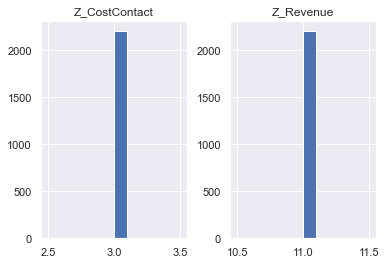

In [4]:
df_ifood.hist(['Z_CostContact', 'Z_Revenue'])
df_food = df_ifood.rename(columns = {'Customer_Days': 'CustomerDays'}, inplace = False)


In [5]:
#Бачимо, що кожен рядок містить одну й ту ж змінну в цих двох стовпцях, тому можемо їх не використовувати в подальшому
df_food.drop(['Z_CostContact', 'Z_Revenue'], axis=1, inplace=True)

In [6]:
df_food.describe()

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,marital_Together,marital_Widow,education_2n Cycle,education_Basic,education_Graduation,education_Master,education_PhD,MntTotal,MntRegularProds,AcceptedCmpOverall
count,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,...,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.00000
mean,51622.094785,0.442177,0.506576,49.009070,306.164626,26.403175,165.312018,37.756463,27.128345,44.057143,...,0.257596,0.034467,0.089796,0.024490,0.504762,0.165079,0.215873,562.764626,518.707483,0.29932
std,20713.063826,0.537132,0.544380,28.932111,337.493839,39.784484,217.784507,54.824635,41.130468,51.736211,...,0.437410,0.182467,0.285954,0.154599,0.500091,0.371336,0.411520,575.936911,553.847248,0.68044
min,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,-283.000000,0.00000
25%,35196.000000,0.000000,0.000000,24.000000,24.000000,2.000000,16.000000,3.000000,1.000000,9.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,56.000000,42.000000,0.00000
50%,51287.000000,0.000000,0.000000,49.000000,178.000000,8.000000,68.000000,12.000000,8.000000,25.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,343.000000,288.000000,0.00000
75%,68281.000000,1.000000,1.000000,74.000000,507.000000,33.000000,232.000000,50.000000,34.000000,56.000000,...,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,964.000000,884.000000,0.00000
max,113734.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,262.000000,321.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2491.000000,2458.000000,4.00000


Можна подивитися на взаємодію всіх змінних з усіма (через велику к-сть факторних змінних це не завжди доречно робити). Але перед цим заберемо частину даних.

In [7]:
sub_data = df_food.copy()
sub_data.drop(['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'marital_Divorced',
               'marital_Married', 'marital_Single', 'marital_Together', 'marital_Widow', 'education_2n Cycle',
               'education_Basic', 'education_Graduation', 'education_Master', 'education_PhD'], axis=1, inplace=True)



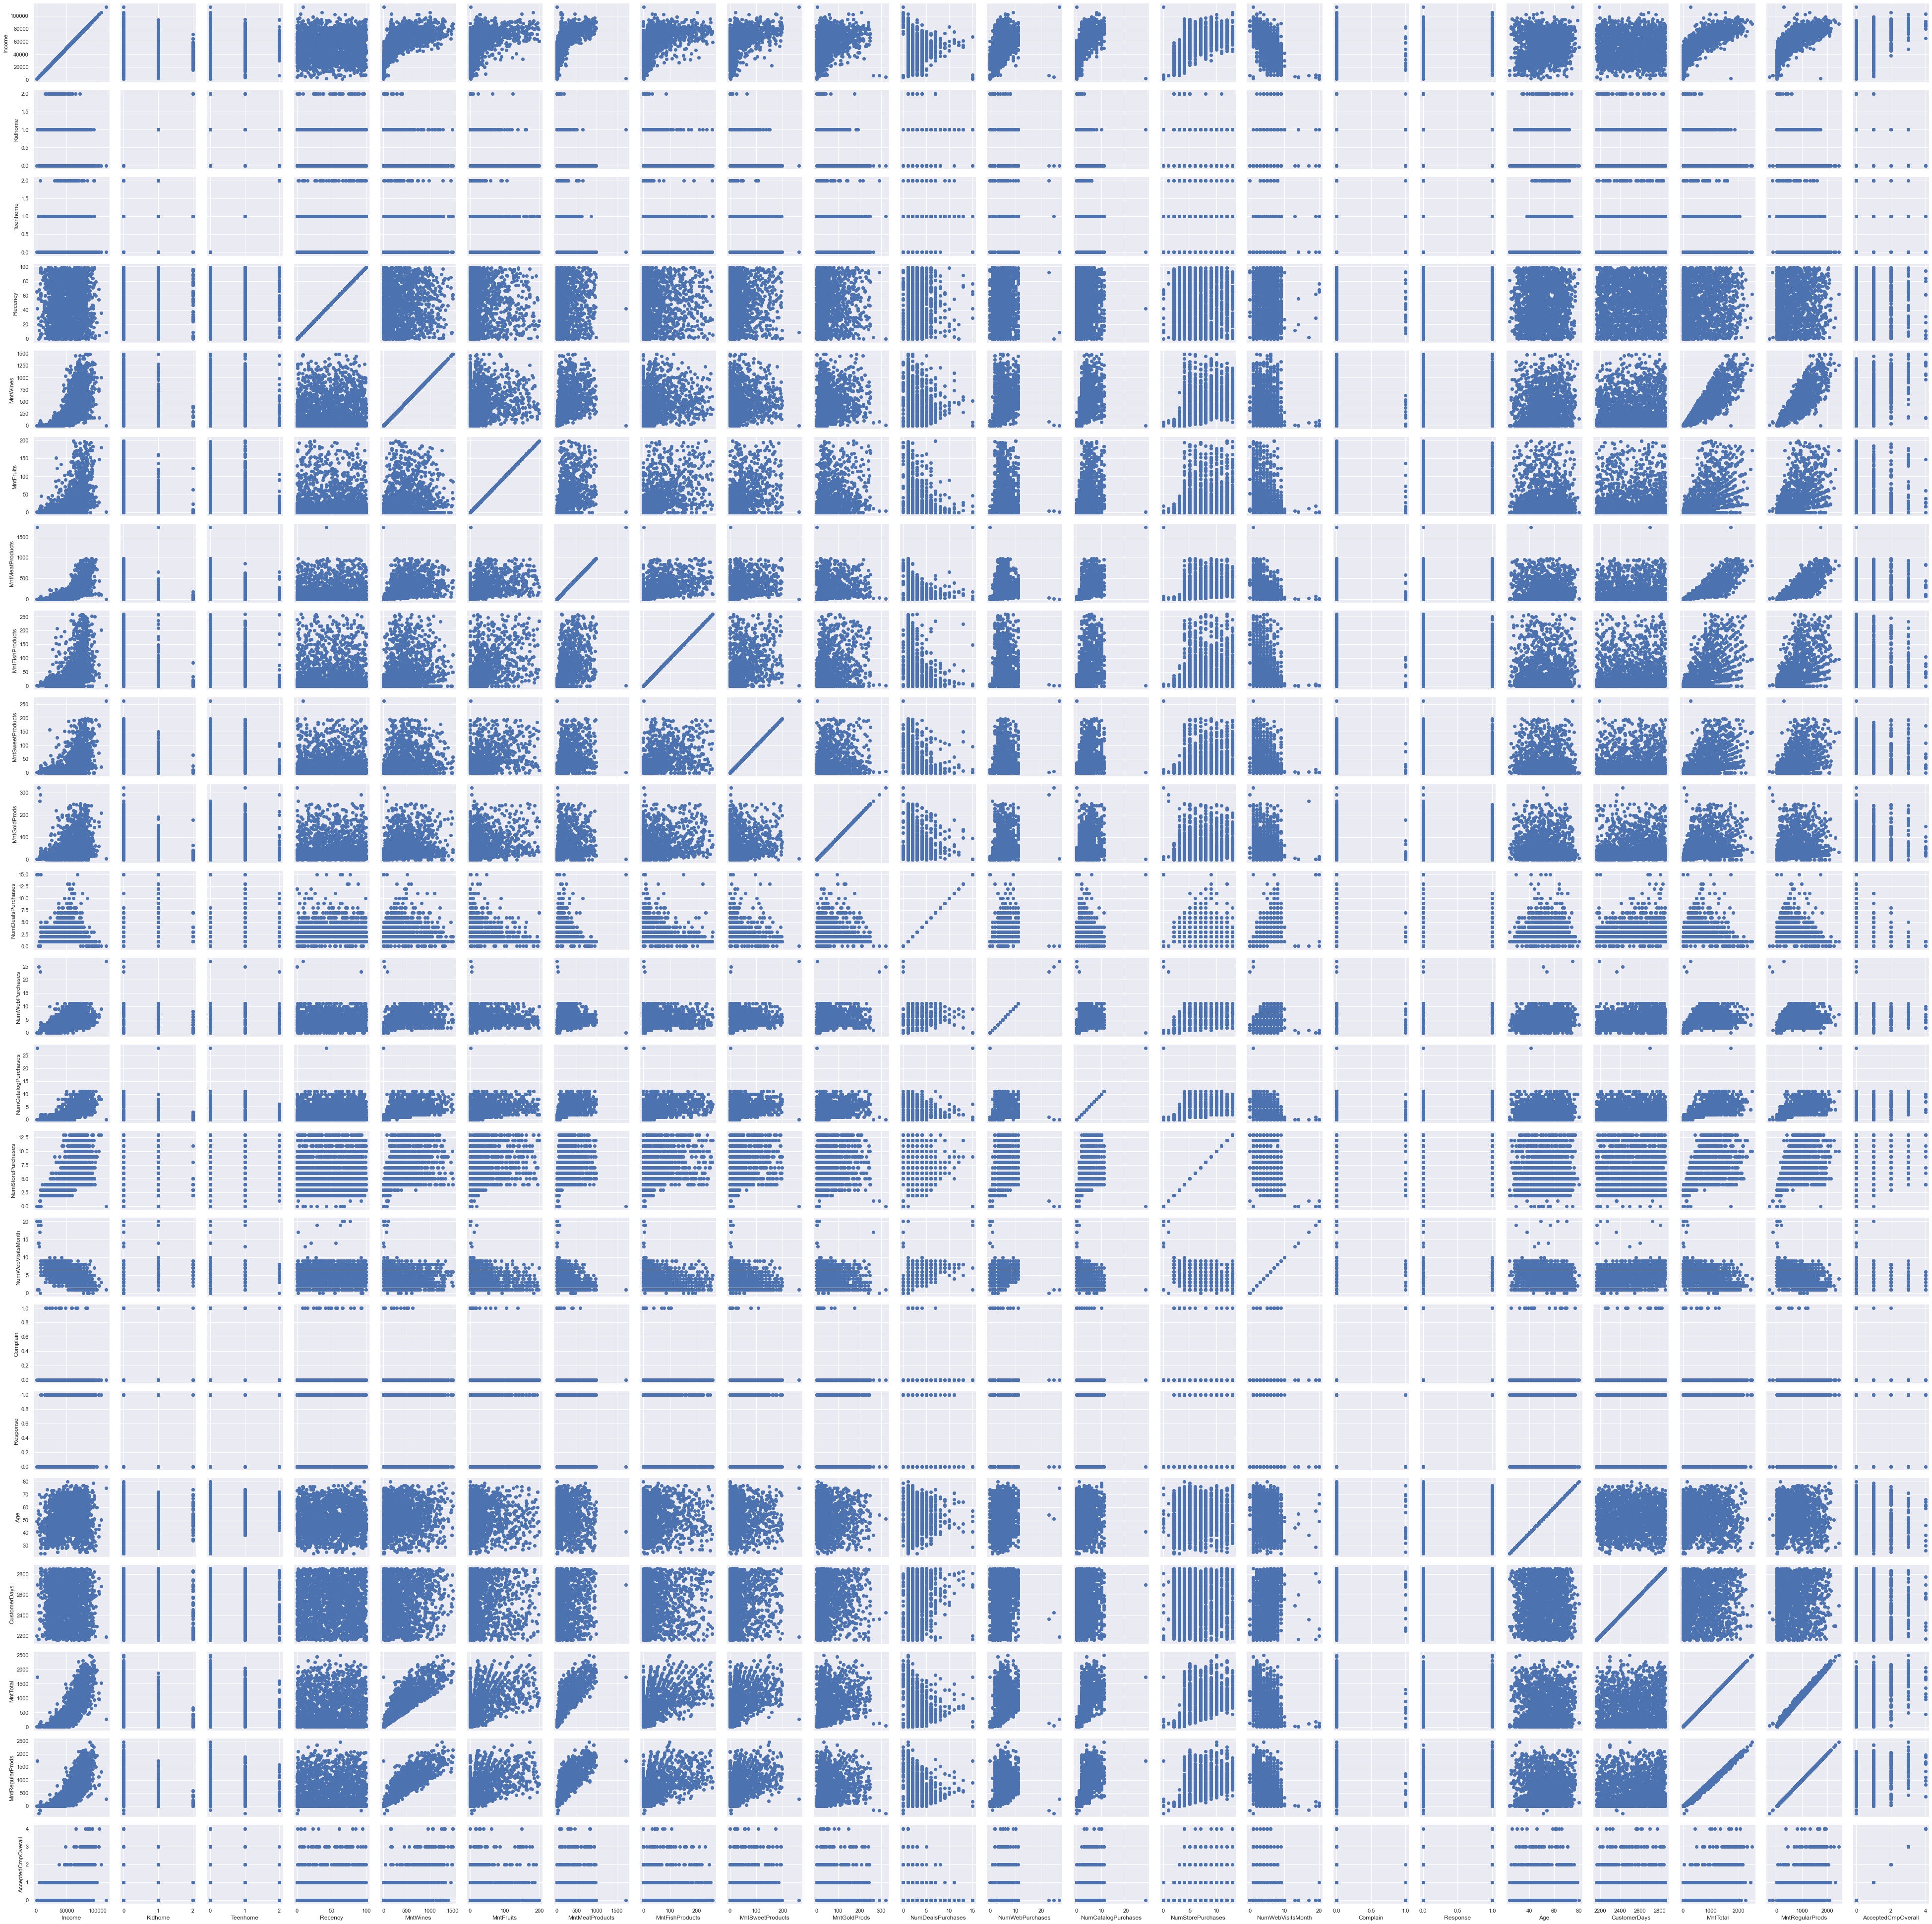

In [8]:
pair_grid_plot = sns.PairGrid(sub_data)
pair_grid_plot.map(plt.scatter)

Спостерігаємо, що між деякими змінними є зв'язки, тому зменшимо обсяги даних до тих, що можуть бути пов'язані.

In [9]:
sub_data2 = sub_data.copy()
sub_data2.drop(['Kidhome', 'Teenhome', 'NumDealsPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
               'Complain','Response', 'CustomerDays', 'AcceptedCmpOverall'], axis=1, inplace=True)

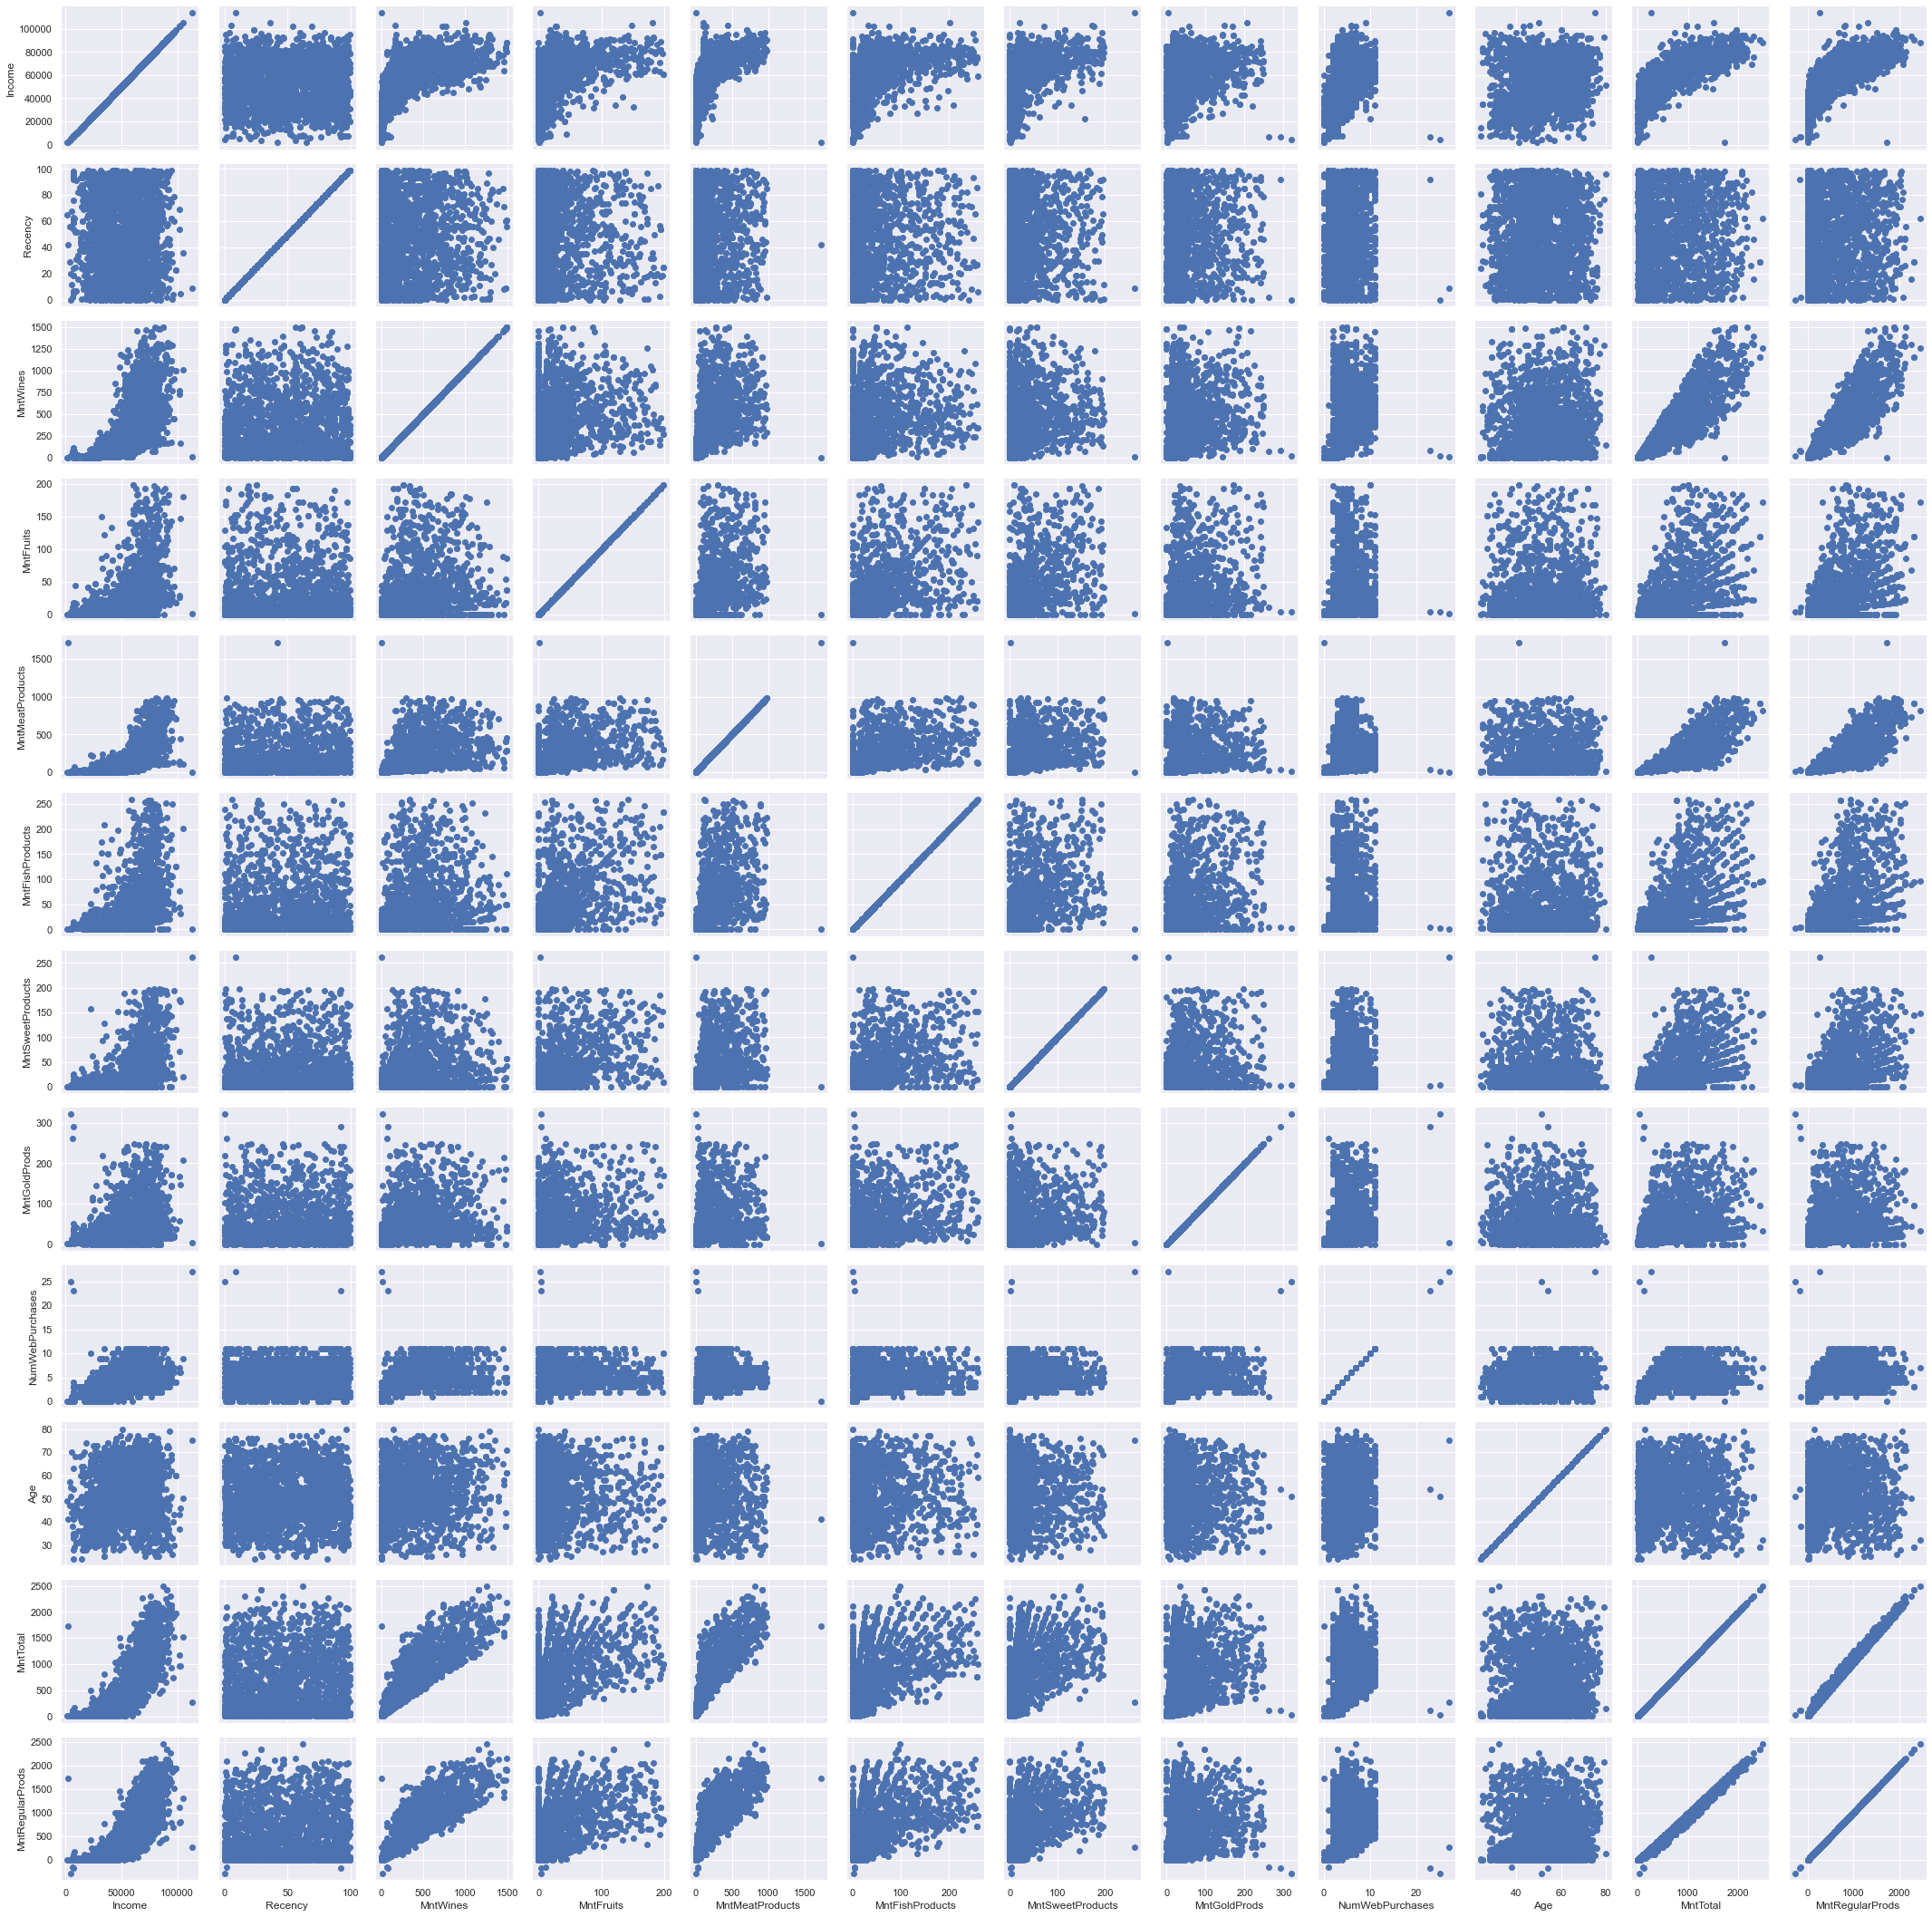

In [10]:
pair_grid_plot2 = sns.PairGrid(sub_data2)
pair_grid_plot2.map(plt.scatter)

При зменшенні обсягу даних можемо спостерігати, наприклад, залежності між доходами та сумами витраченими на ті,чи інші продукти(це ми бачимо по діагональному розсіюванні даних).

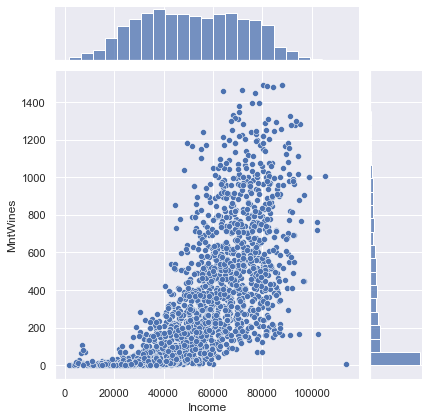

In [11]:
#Задля інтересу можемо роглянути ближче як розподіляється дохід(Income) та сума, що витрачається на вино(MntWines)
sns.jointplot(x = 'Income', y = 'MntWines', data = df_food)

Із графіку вище бачимо, що більшість людей витрачають менші суми на вино; зі збільшенням доходів - витрачають більші суми, а чим доходи менші - тим менше витрачають на вино.

Бачимо 4 викиди, якими при, наприклад, дослідженні взаємодії кількості відвідувань веб сторінки(NumWebVisits) і кількістю покупок через веб-сторінку(NumWebPurchases) ми зможемо знехтувати.

Далі варто виділити наші попередньо визначені групи в окремі датасети та дослідити їх на наявність аномалій та викидів

In [12]:
#дані про користувачів також розділимо окремо на дискретні та неперервні
df_customers_d = df_food[['Kidhome', 'Teenhome', 'marital_Divorced', 'marital_Married',
                        'marital_Single', 'marital_Together', 'marital_Widow','Complain', 'education_2n Cycle', 'education_Basic',
                        'education_Graduation', 'education_Master',
                        'education_PhD']]
df_customers_c = df_food[['Income', 'Age', 'CustomerDays', 'Recency']]

df_places = df_food[['NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth']]

df_products = df_food[['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
                      'MntGoldProds', 'MntTotal', 'MntRegularProds']]

df_promotions = df_food[['NumDealsPurchases', 'AcceptedCmp3', 'AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp4',
                        'AcceptedCmp5', 'AcceptedCmpOverall', 'Response']]


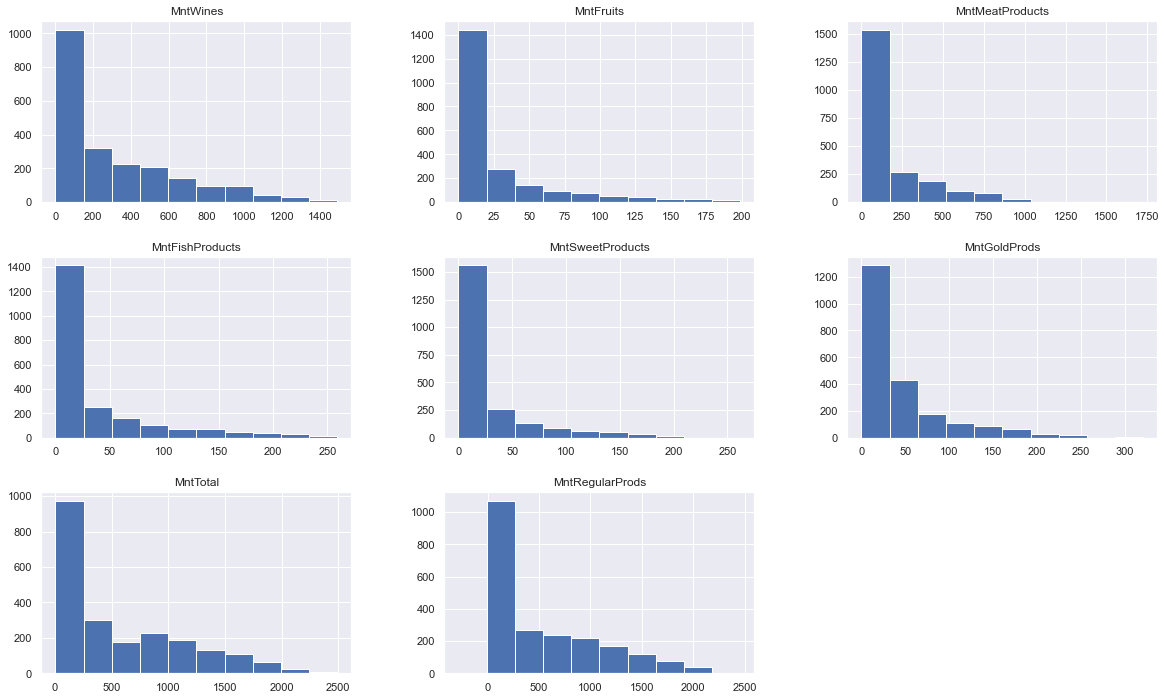

In [13]:
#розглянемо дані про продуктти
df_products.hist(column = ['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
                           'MntGoldProds', 'MntTotal', 'MntRegularProds'], figsize=(20,12));

Майже немає незвичайних сум. Хіба що виникає запитання щодо сум витрачених на м'ясні продукти, що є більшими від 1100.

<AxesSubplot:>

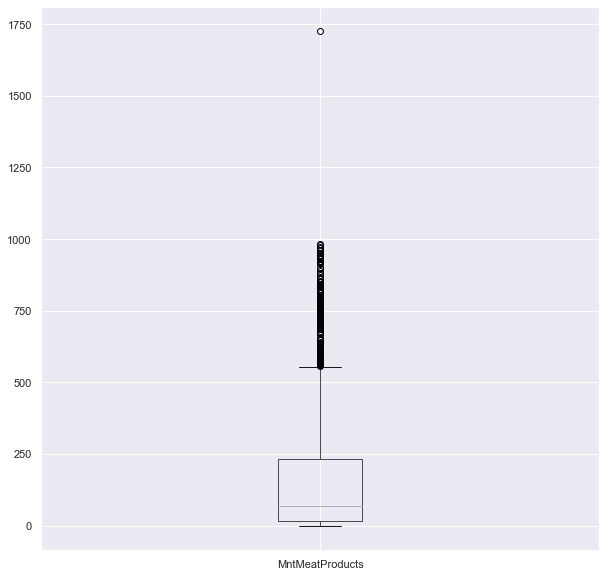

In [14]:
fig, ax = plt.subplots(1, figsize=(10,10))

df_products.boxplot(column=['MntMeatProducts'])

In [15]:
Q1 = df_food.MntMeatProducts.quantile(0.25)
Q3 = df_food.MntMeatProducts.quantile(0.75)
IQR = Q3 - Q1

MntMeat_outliers = df_food[df_food.MntMeatProducts > Q3 + 1.5*IQR]
df_food = df_food[df_food.MntMeatProducts < Q3 + 1.5*IQR]
MntMeat_outliers.head()

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,marital_Together,marital_Widow,education_2n Cycle,education_Basic,education_Graduation,education_Master,education_PhD,MntTotal,MntRegularProds,AcceptedCmpOverall
20,2447.0,1,0,42,1,1,1725,1,1,1,...,0,0,0,0,1,0,0,1729,1728,0
27,84618.0,0,0,96,684,100,801,21,66,0,...,0,0,0,0,0,0,1,1672,1672,1
47,79143.0,0,0,2,650,37,780,27,167,32,...,0,0,0,0,0,1,0,1661,1629,0
70,75251.0,0,0,34,721,111,925,97,18,18,...,0,0,0,0,0,1,0,1872,1854,0
71,75825.0,0,0,40,1032,105,779,137,105,51,...,0,0,0,0,1,0,0,2158,2107,1


Розглянемо дані пов'язані із просуванням. Оскільки всі змінні тут є дискретними, то використаємо гістограми.


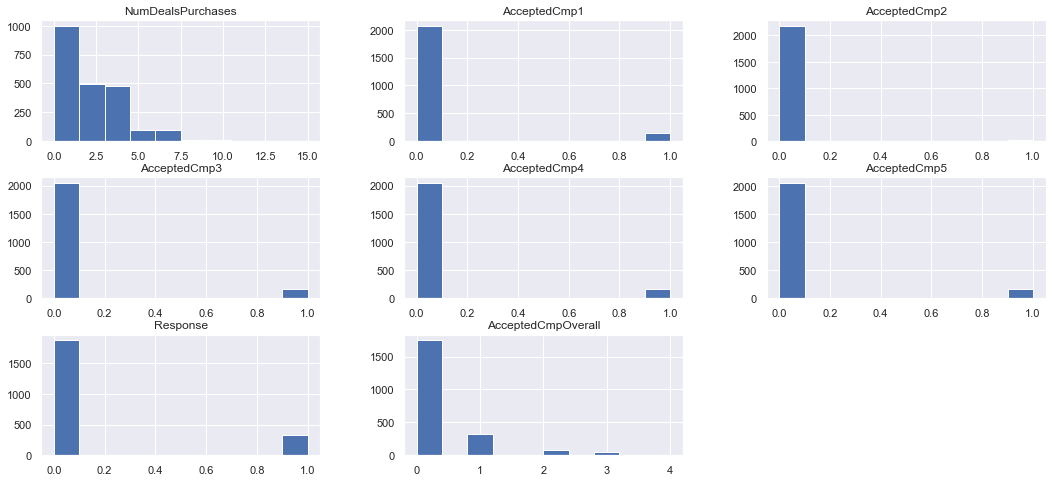

In [16]:
df_promotions.hist(column = ['NumDealsPurchases','AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5',
                             'Response', 'AcceptedCmpOverall'], figsize=(18,8));

Тут викидів не спостерігаємо.

Розглянемо тепер датасет із даними про місця. Тут також використовуємо гістограми.

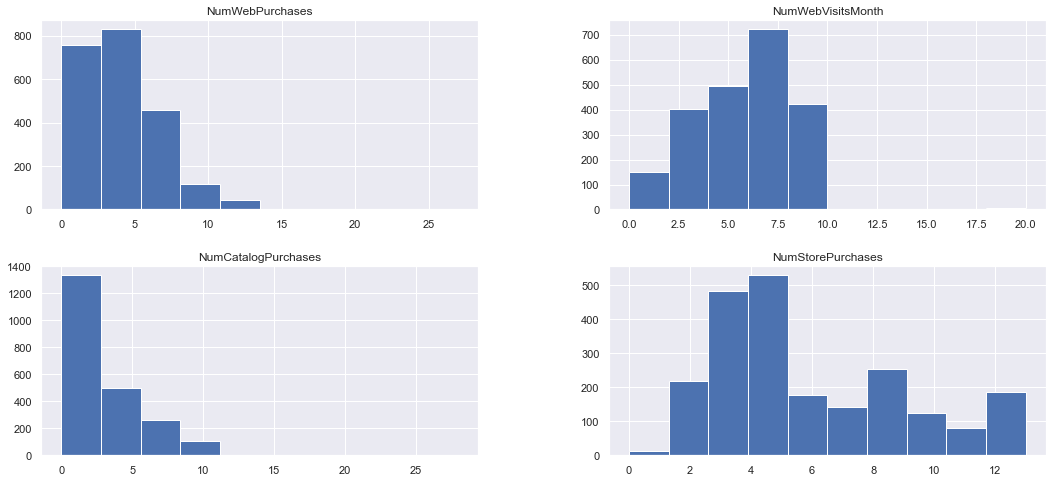

In [17]:
df_places.hist(column = ['NumWebPurchases','NumWebVisitsMonth', 'NumCatalogPurchases', 'NumStorePurchases'], figsize=(18,8));

Викидів не спостерігаємо.

Тепер розглянемо дані про користувачів.

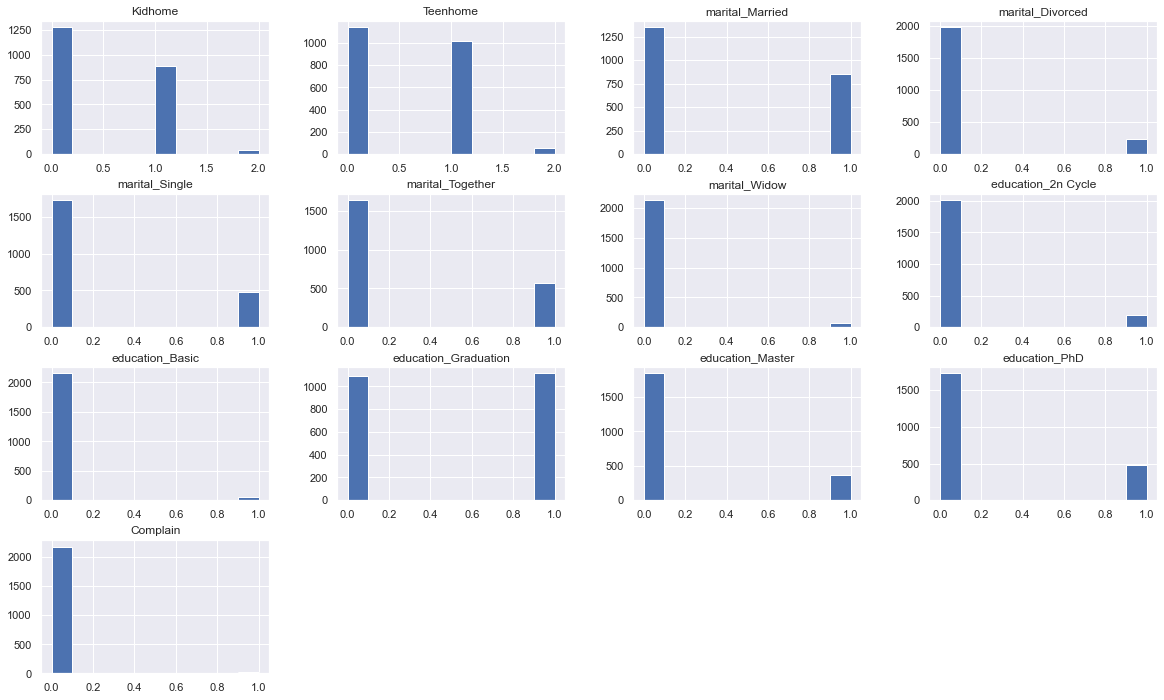

In [18]:
#Спочатку розглянемо дискретні дані
df_customers_d.hist(column = ['Kidhome','Teenhome', 'marital_Married','marital_Divorced','marital_Single',
                             'marital_Together', 'marital_Widow','education_2n Cycle','education_Basic',
                             'education_Graduation','education_Master','education_PhD', 'Complain'], figsize=(20,12));

Бачимо, що ніяких викидів немає. Розглянемо тепер на інші дані про користувачів.

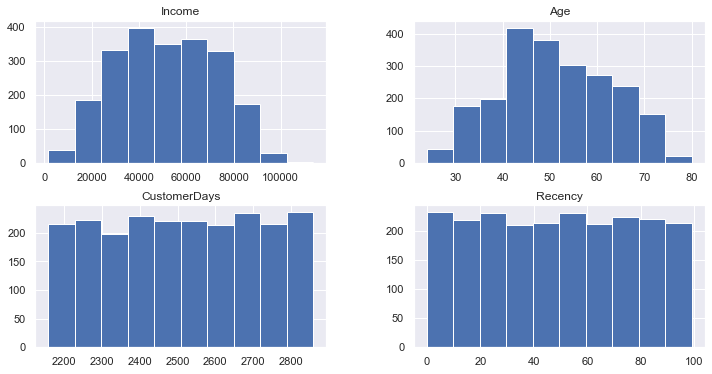

In [19]:
df_customers_c.hist(column = ['Income','Age', 'CustomerDays','Recency'], figsize=(12,6));

Бачимо, що викидів теж немає.

In [20]:
dat_children = df_food['Kidhome'] + df_food['Teenhome']
df_food['ChildrenTotal'] = dat_children
dat_purch_total = df_food['NumWebPurchases'] + df_food['NumCatalogPurchases'] + df_food['NumStorePurchases']
df_food['NumPurchasesTotal'] = dat_purch_total

In [21]:
df_food_num = df_food.drop(['marital_Divorced', 'marital_Married', 'marital_Single', 'marital_Together',
                            'marital_Widow','Complain', 'education_2n Cycle', 'education_Basic', 'education_Graduation',
                            'education_Master','education_PhD', 'AcceptedCmp3', 'AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp4',
                            'AcceptedCmp5'], axis=1)

<AxesSubplot:>

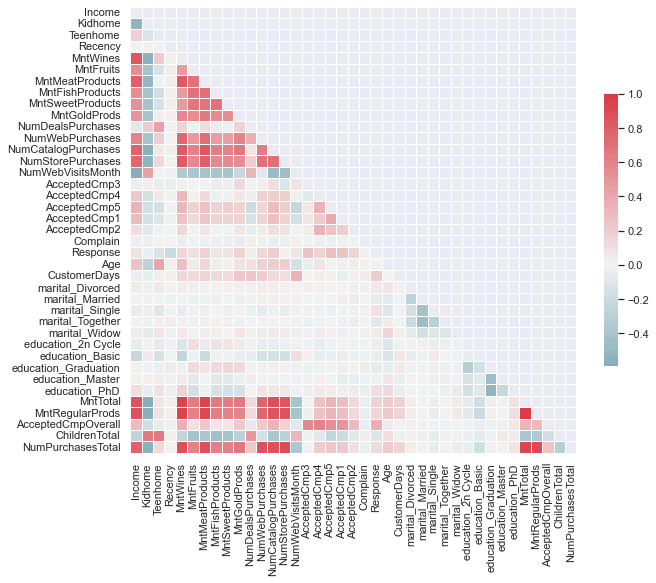

In [22]:
corr = df_food.corr(method='spearman')
corr_mask = corr.mask(np.triu(np.ones_like(corr, dtype=bool)))
corr_unstacked = corr_mask.unstack().sort_values(ascending = False)
# Draw the heatmap with the mask and correct aspect ratio
mask = np.triu(np.ones_like(corr, dtype=bool))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
plt.subplots(figsize=(10,10))
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [23]:
pd.DataFrame(corr_unstacked[(abs(corr_unstacked)>0.8)&(abs(corr_unstacked)<1)]).sort_index().style.background_gradient(cmap='coolwarm', low=.5, high=-.7)

In [24]:
pd.DataFrame(corr_unstacked[corr_unstacked<-.5]).sort_index().style.background_gradient(cmap='coolwarm', low=-.6, high=.5)

Дохід пов'язаний із декількома іншими показниками, таких як сума витрат, що зумовлене позитивною кореляцією із сумами на вино, і він має негативну кореляцію з кількістю дітей вдома та кількістю відвідувань веб-сайту.

Сума витрат на вино, крім того, що є пов’язаною з високим доходом, залежить від суми, витраченої на м’ясо та його придбання в каталозі, чи в магазинах.

Кількість дітей маж негативну кореляцію з доходом, сумою загальних витрат і, як наслідок, пов’язана з вином.


Наприклад, можемо задатися питанням, які ж фактори суттєво пов'язані із кількістю покупок у магазині?
Припустимо, що чим більша кількість малих дітей(Kidhome), тим імовірніше, що в клієнтів не буде часу на відвідування магазинів і вони віддадуть перевагу онлайн покупкам чи покупкам за каталогом.

c:\users\1a\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


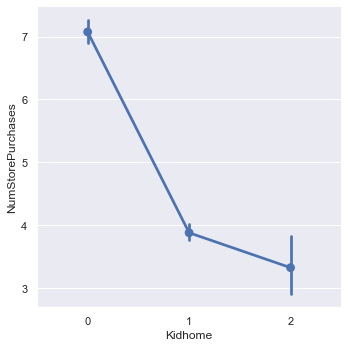

In [25]:
sns.catplot('Kidhome', 'NumStorePurchases', kind = 'point', data = df_food);

c:\users\1a\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


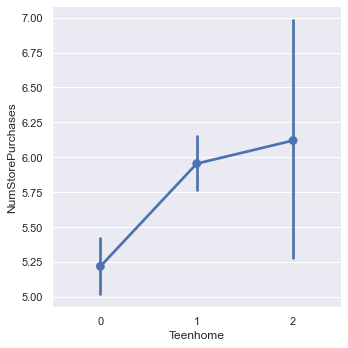

In [26]:
sns.catplot('Teenhome', 'NumStorePurchases', kind = 'point', data = df_food);

Спостерігаємо, що чим більше у сім'ї малих дітей - тим менше покупок у магазині, але якщо в сім'ї є підлітки - навпаки.

Також, можемо припустити, що люди приймають пропозиції на покупки в залежності від певного каналу продажів.

c:\users\1a\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


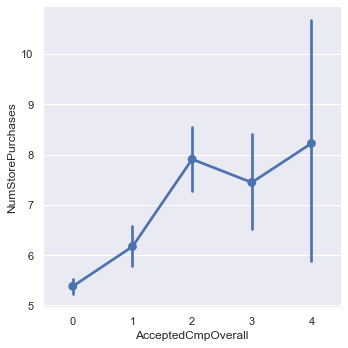

In [27]:
sns.catplot('AcceptedCmpOverall', 'NumStorePurchases', kind = 'point', data = df_food);

c:\users\1a\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


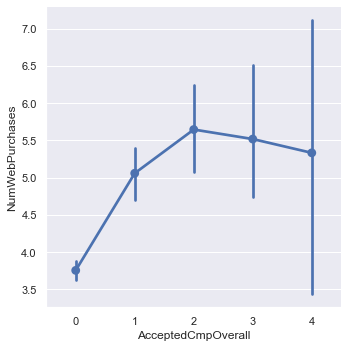

In [28]:
sns.catplot('AcceptedCmpOverall', 'NumWebPurchases', kind = 'point', data = df_food);

c:\users\1a\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


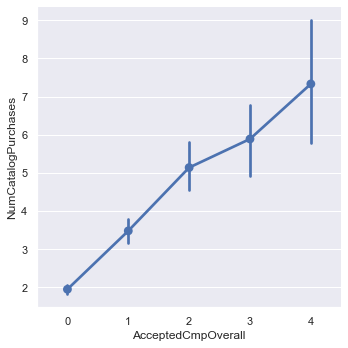

In [29]:
sns.catplot('AcceptedCmpOverall', 'NumCatalogPurchases', kind = 'point', data = df_food);

Бачимо, що канал каталогу - є найкращим для просування акційних пропозицій з-поміж інших каналів. Інші канали теж ефективні.

Також можемо припустити, що чим давніше користувач здійснив свою першу покупку, тим імовірніше, що він буде здійснювати в магазині все більше й більше покупок.

c:\users\1a\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


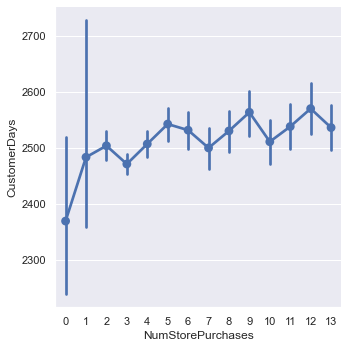

In [30]:
sns.catplot('NumStorePurchases', 'CustomerDays', kind = 'point', data = df_food);

## Сегментація користувачів

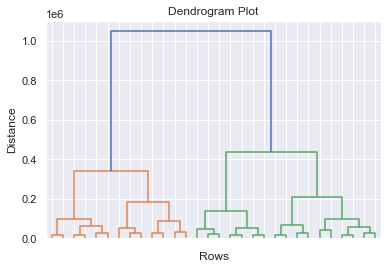

In [31]:
df_food_cluster = df_food.drop(['Response'], axis=1)

input_matrix = linkage(df_food_cluster, 'ward')

plt.title('Dendrogram Plot')
plt.xlabel('Rows')
plt.ylabel('Distance')

dendrogram(
    input_matrix,
    truncate_mode='lastp',show_leaf_counts=False,
    leaf_rotation=90., leaf_font_size=12., show_contracted=True,)

plt.show()

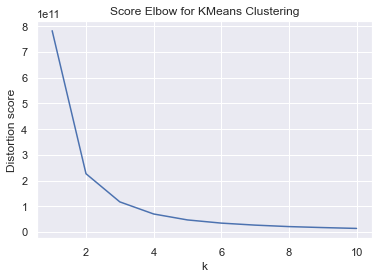

In [32]:
km_eval = []

for i in range(1,11):
    kmeans_model=KMeans(n_clusters=i,init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans_model.fit(df_food_cluster)
    km_eval.append(kmeans_model.inertia_)

#зображення методу к-середніх для к від 1 до 10
plt.plot(range(1,11), km_eval)
plt.title('Score Elbow for KMeans Clustering')
plt.xlabel('k')
plt.ylabel('Distortion score')
plt.show()

#### До датасету підійде значення k=3 методу к-середніх

In [33]:
#Підігнання й передбачення кластерів
kmeans_model = KMeans(n_clusters=3, init='k-means++', max_iter=300, n_init=10, random_state=0)
df_food_cluster['cluster'] = kmeans_model.fit_predict(df_food_cluster)

In [34]:
df_food_cluster.cluster.value_counts()

0    736
1    656
2    643
Name: cluster, dtype: int64

C:\Users\1a\AppData\Local\Temp\ipykernel_15700\1473356881.py:3: UserWarning: When passing multiple axes, sharex and sharey are ignored. These settings must be specified when creating axes.
  df_food_cluster.boxplot(column=['Income', 'Age', 'Recency', 'MntWines',


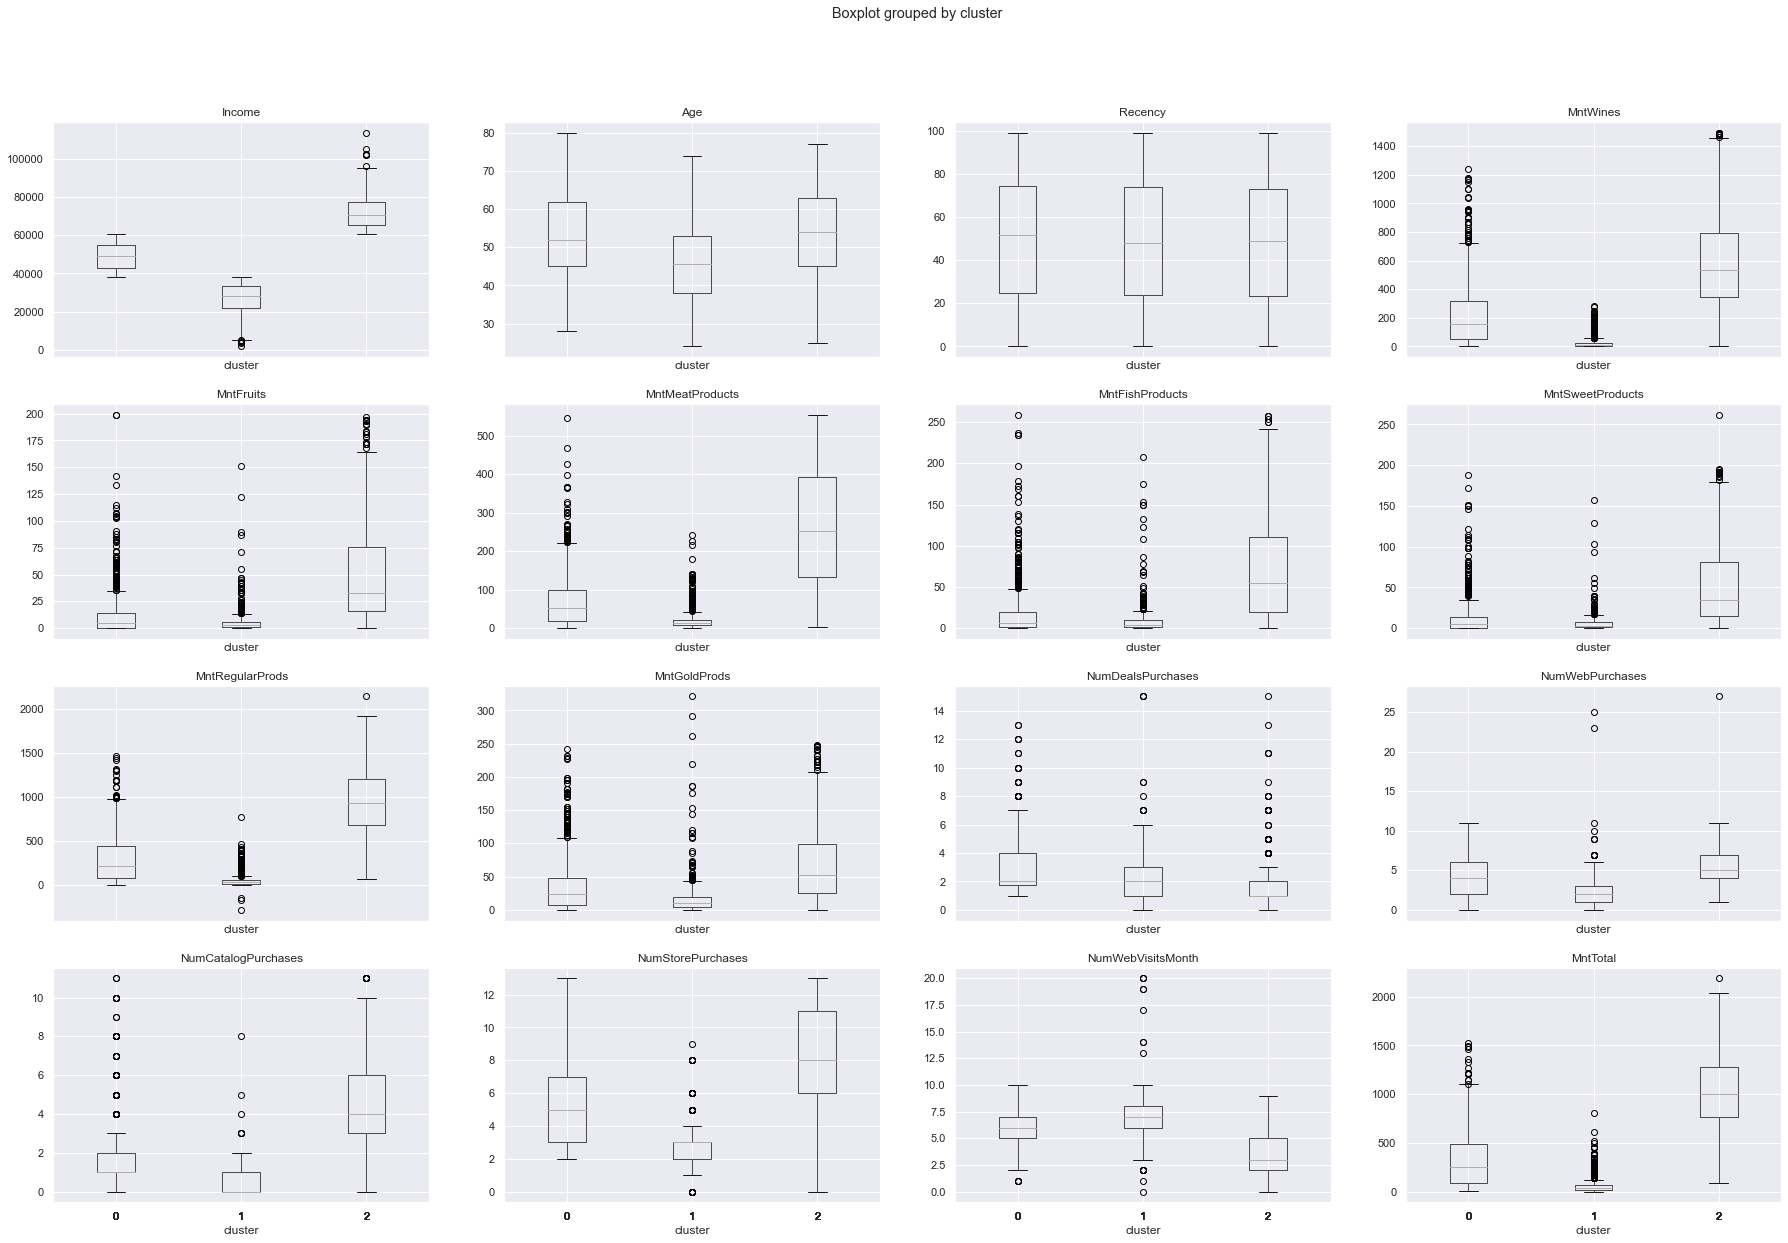

In [35]:
fig, axes = plt.subplots(4,4, sharex= True, sharey= False, figsize=(30,20))

df_food_cluster.boxplot(column=['Income', 'Age', 'Recency', 'MntWines',
                                'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
                                'MntRegularProds','MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
                                'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth', 'MntTotal'], ax = axes, by='cluster');

<AxesSubplot:xlabel='cluster', ylabel='count'>

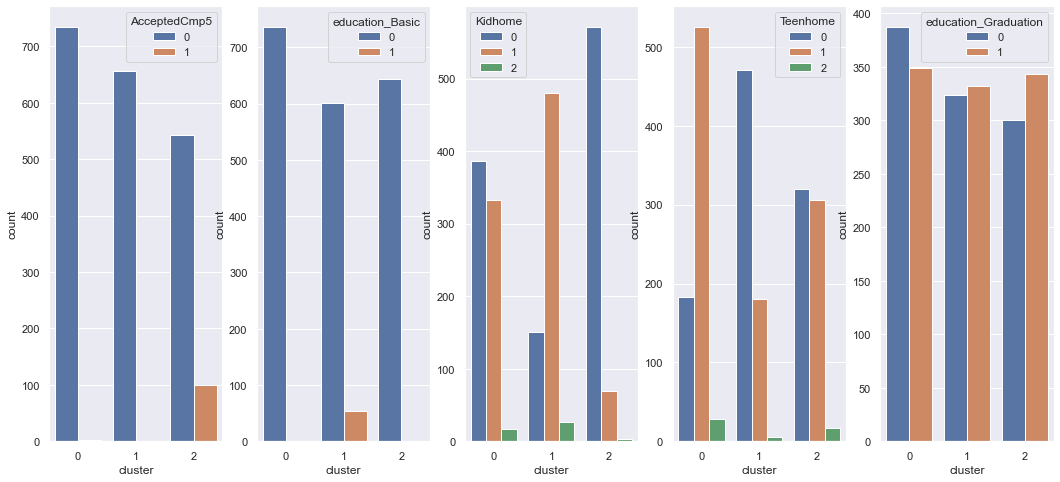

In [36]:
fig, ax = plt.subplots(1,5, figsize=(18,8))

sns.countplot(x="cluster", hue="AcceptedCmp5", data=df_food_cluster, ax=ax[0])
sns.countplot(x="cluster", hue="education_Basic", data=df_food_cluster, ax=ax[1])
sns.countplot(x="cluster", hue="Kidhome", data=df_food_cluster, ax=ax[2])
sns.countplot(x="cluster", hue="Teenhome", data=df_food_cluster, ax=ax[3])
sns.countplot(x="cluster", hue="education_Graduation", data=df_food_cluster, ax=ax[4])

<AxesSubplot:xlabel='cluster', ylabel='count'>

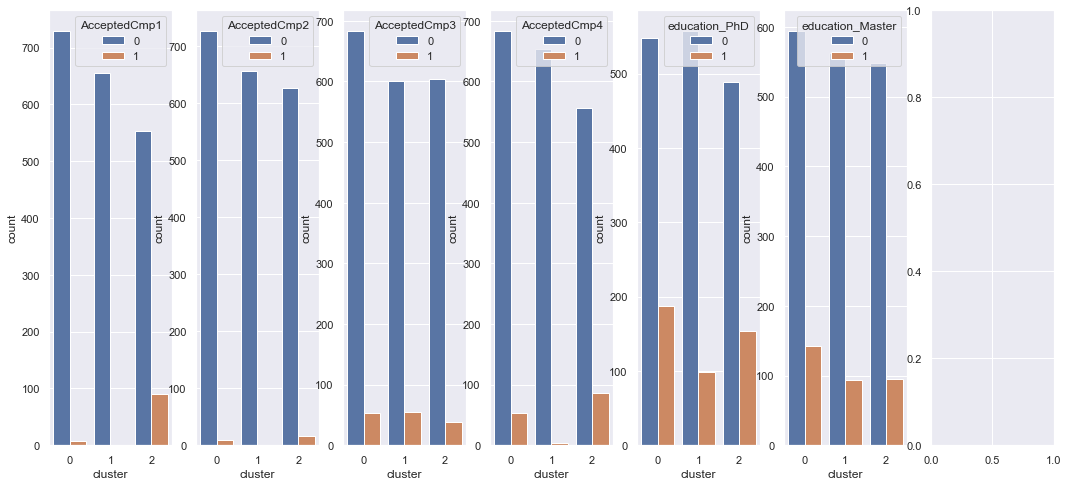

In [37]:
fig, ax = plt.subplots(1,7, figsize=(18,8))

sns.countplot(x="cluster", hue="AcceptedCmp1", data=df_food_cluster, ax=ax[0])
sns.countplot(x="cluster", hue="AcceptedCmp2", data=df_food_cluster, ax=ax[1])
sns.countplot(x="cluster", hue="AcceptedCmp3", data=df_food_cluster, ax=ax[2])
sns.countplot(x="cluster", hue="AcceptedCmp4", data=df_food_cluster, ax=ax[3])
sns.countplot(x="cluster", hue="education_PhD", data=df_food_cluster, ax=ax[4])
sns.countplot(x="cluster", hue="education_Master", data=df_food_cluster, ax=ax[5])


## Згенеруємо модель

In [38]:
features = df_food.drop('Response', axis =1)
labels = df_food.Response

#Розбиття датасету на тренувальний та тестовий
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.40, random_state = 5)

In [39]:
#Використання сітки пошуку для знаходження найкращих параметрів
param_grid = { 
    'n_estimators': [50, 100, 200],
    'max_features': ['auto'],
    'max_depth' : [None,3,5,8],
    'criterion' :['gini'],
    'min_samples_split':[2,3,4]
}

#Тренування Random Forest моделей для k-fold = 5
rf_models = GridSearchCV(RandomForestClassifier(random_state = 5), param_grid=param_grid, cv=5, verbose=1)
rf_models.fit(X_train, y_train)

Fitting 5 folds for each of 36 candidates, totalling 180 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=5),
             param_grid={'criterion': ['gini'], 'max_depth': [None, 3, 5, 8],
                         'max_features': ['auto'],
                         'min_samples_split': [2, 3, 4],
                         'n_estimators': [50, 100, 200]},
             verbose=1)

In [40]:
#отримаємо прогноз
predictions = rf_models.predict(X_test)

#точність моделі, тобто як часто класифікатор є правильним
print("Accuracy:", metrics.accuracy_score(predictions, y_test))

Accuracy: 0.8857493857493858


In [41]:
#Показник та його важливість
feature_importance = pd.DataFrame(data={"features":X_test.columns, "importance":rf_models.best_estimator_.feature_importances_*100})
feature_importance.sort_values('importance', ascending=False).head(10).style.background_gradient(cmap='coolwarm', low=1, high=0)

,features,importance
3,Recency,8.677783
22,CustomerDays,8.309809
35,AcceptedCmpOverall,7.776436
33,MntTotal,5.237689
34,MntRegularProds,5.098576
0,Income,4.958001
4,MntWines,4.360675
6,MntMeatProducts,4.296393
9,MntGoldProds,4.288805
14,NumWebVisitsMonth,3.869185


Для нової кампанії ми розробляємо модель прогнозування, яка визначає чи прийме клієнт пропозиції чи ні.
Ми можемо визначати це з 88% точності.
Історія минулих кампаній(Recency та AcceptedCmpOverall) та клієнтcька вірність(тобто кількість днів від першої покупки клієнта - CustomerDays) є вирішальними факторами для цього передбачення.
Тобто найімовірніше, що нові пропозиції прийматимуть саме постійні клієнти, які приймали останню пропозицію та досить давно здійснили першу покупку.

In [42]:
def undummify(df, prefix_sep="_"):
    cols2collapse = {
        item.split(prefix_sep)[0]: (prefix_sep in item) for item in df.columns
    }
    series_list = []
    for col, needs_to_collapse in cols2collapse.items():
        if needs_to_collapse:
            undummified = (
                df.filter(like=col)
                .idxmax(axis=1)
                .apply(lambda x: x.split(prefix_sep, maxsplit=1)[1])
                .rename(col)
            )
            series_list.append(undummified)
        else:
            series_list.append(df[col])
    undummified_df = pd.concat(series_list, axis=1)
    return undummified_df

In [43]:
df_food_group = undummify(df_food)

In [44]:
df_food_group.to_csv('ifood_groupped.csv')